In [131]:
import random
import pandas as pd 
import matplotlib.pyplot as plt 
import functools
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [96]:
# generating the dataset
def generate_data():
    x_data = []
    y_data = []
    
    m = 5
    c = 10
    for i in range(0, 100):
        x = random.randint(1, 100)       
        x_data.append(x) 
        
        y = m*x + c + random.randint(-100,100)
        y_data.append(y)

    data = pd.DataFrame({'x_data' : x_data,'y_data' : y_data})
    return data


df = generate_data()



In [97]:
df.head()

,x_data,y_data
0,56,324
1,90,391
2,9,-13
3,88,503
4,76,449


In [98]:
df['x_data'].max()

99

In [99]:
df['y_data'].max()

573

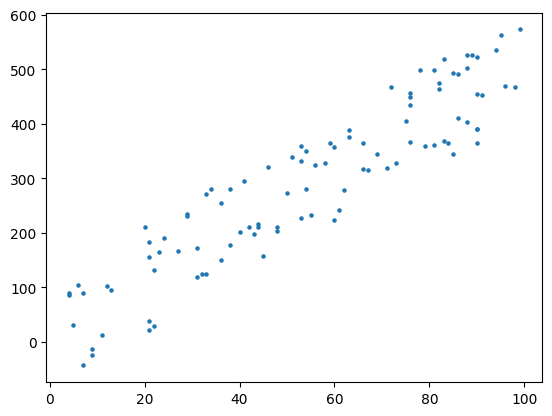

In [100]:
plt.scatter(df['x_data'], df['y_data'], s=5)

In [171]:

# declaring Linear_Regression
class My_Linear_Regression: 

    def __init__(self, m = None , c = None, loss = 0): 
        self.m = random.uniform(0,1)
        self.c = random.uniform(0,1)
        self.loss = loss 


    def fit(self, X_train , y_train, alpha = 0.001, epochs = 10):
        
        # Normalizing
        X_train = X_train / X_train.max()
        
        data_size = len(X_train)
        # itretion
        for epoch in range(epochs):
            self.loss = 0
            y_pred_list = []
            
            # forward propgation
            for i in range(data_size): 
                X = X_train.iloc[i]
                y_pred = self.m * X + self.c 
                y_pred_list.append(y_pred)
                error = (y_train.iloc[i] - y_pred)**2
                self.loss+=error
                
            self.loss = self.loss / data_size
            # printing loss
            if epoch == 0:
                print(f"Epoch {epoch + 1}, Loss: {self.loss:.4f}")
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}, Loss: {self.loss:.4f}")
    
            # gradient for m & c
            m_sum = 0
            c_sum = 0
            
            for i in range(data_size): 
                X_actual = X_train.iloc[i]
                y_actual = y_train.iloc[i]
                y_pred = y_pred_list[i]
                
                m_sum += X_actual*(y_actual - y_pred)
                c_sum += (y_actual - y_pred)
                
            # gradients    
            tangent_gradient_m = - (2/data_size) * m_sum            
            tangent_gradient_c = - (2/data_size) * c_sum
    
            # updating parameters 
            self.m = self.m - alpha * tangent_gradient_m
            self.c = self.c - alpha * tangent_gradient_c
            
        return "Slope: ",self.m , "Intercept: ",self.c
            
model = My_Linear_Regression()       
model.fit(df['x_data'], df['y_data'],alpha=0.02, epochs=1000)      


Epoch 1, Loss: 0.5266
Epoch 100, Loss: 0.0247
Epoch 200, Loss: 0.0182
Epoch 300, Loss: 0.0144
Epoch 400, Loss: 0.0122
Epoch 500, Loss: 0.0109
Epoch 600, Loss: 0.0101
Epoch 700, Loss: 0.0096
Epoch 800, Loss: 0.0093
Epoch 900, Loss: 0.0092
Epoch 1000, Loss: 0.0091


('Slope: ', 0.7362634968026746, 'Intercept: ', 0.15406088689255093)

# Cross check with sklearn LinearRegression function

In [168]:

scaler = MinMaxScaler()

df[['x_data']] = scaler.fit_transform(df[['x_data']])

X = df[['x_data']]  
y = df['y_data']  

model = SGDRegressor(
    alpha=0.02,       
    max_iter=1,       
    warm_start=True,  
    random_state=42
)

epochs = 1000

for epoch in range(epochs):
    
    model.partial_fit(X, y)
    y_pred = model.predict(X)
    loss = mean_squared_error(y, y_pred)

    if (epoch + 1) % 100 == 0:  
        print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

print(f'Slope: {model.coef_} , Intercept: {model.intercept_}')

Epoch 100, Loss: 0.0155
Epoch 200, Loss: 0.0127
Epoch 300, Loss: 0.0117
Epoch 400, Loss: 0.0113
Epoch 500, Loss: 0.0110
Epoch 600, Loss: 0.0109
Epoch 700, Loss: 0.0109
Epoch 800, Loss: 0.0108
Epoch 900, Loss: 0.0108
Epoch 1000, Loss: 0.0108
Slope: [0.6279558] , Intercept: [0.2104307]
